In [73]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("../data/one_train_denoised.csv",sep=',')
df['timestamp'] = pd.to_datetime(df.timestamp)
# df.set_index('timestamp',inplace=True,drop=True)

In [57]:
df['weekday'] = df.timestamp.apply(lambda x: x.isoweekday())
df['time'] = df.timestamp.apply(lambda x: x.timetuple())
df['day'] = df.time.apply(lambda x: x.tm_mday)
df['hour'] = df.time.apply(lambda x: x.tm_hour)
df['minute'] = df.time.apply(lambda x: x.tm_min)

In [106]:
feature_df.head()

,weekday,hour,minute
0,1,0,0
1,1,0,1
2,1,0,2
3,1,0,3
4,1,0,4


In [98]:
feature_df = df[['weekday','hour','minute']]
y = df['value']

In [103]:
train_x = feature_df[:75*24*60]
test_x = feature_df[75*24*60:]
train_y = y[:75*24*60]
test_y = y[75*24*60:]

In [104]:
from sklearn import cross_validation, metrics  
from sklearn.grid_search import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
# params = {'n_estimators': (100,300,500,800), 'learning_rate': (0.005, 0.05, 0.1, 0.3),"max_depth":(2,3,4,5,6)}
# grid = GridSearchCV(estimator=gbdt, param_grid=params, cv=5)
gbdt.fit(train_x,train_y)
pred = gbdt.predict(test_x)

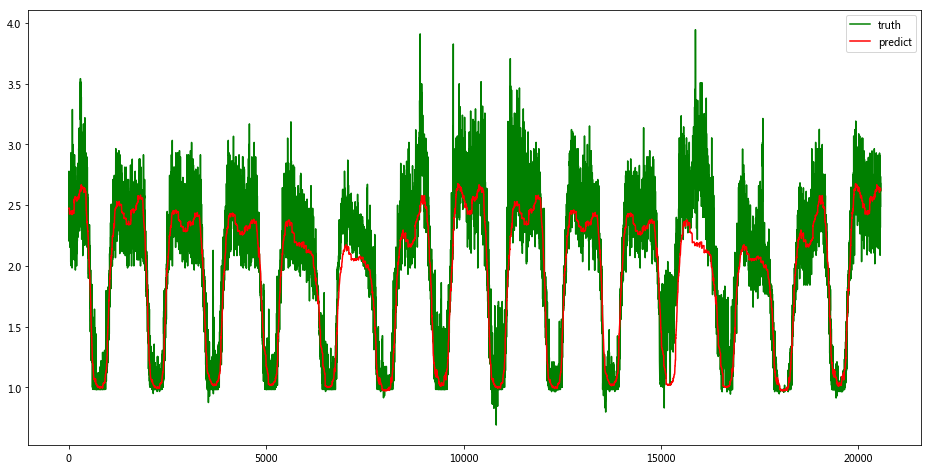

In [105]:
plt.figure(figsize=(16,8))
plt.plot(test_y.values,color='green',label='truth')
plt.plot(pred,color='red',label='predict')
plt.legend(loc='best')
plt.show()

In [107]:
print(mean_squared_error(test_y.values,pred))

0.0675503833022
